### Grain size distribution for each Yerba Mate granulometry

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_1 = pd.read_csv('coarse\dimensions_YM2_gruesa_297x210.jpg.csv')
df_2 = pd.read_csv('medium\dimensions_YM2_medium_297x210.jpg.csv')
df_3 = pd.read_csv('fine\dimensions_YM2_fine_297x210.jpg.csv')
df_4 = pd.read_csv('extrafine\dimensions_YM2_extrafine_200x150.jpg.csv')

df_tot = pd.concat([df_1, df_2, df_3, df_4])
df_1


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\joaqu\AppData\Local\Temp\ipykernel_21832\981743836.py:7: SyntaxWarning: invalid escape sequence '\d'
  df_1 = pd.read_csv('coarse\dimensions_YM2_gruesa_297x210.jpg.csv')
C:\Users\joaqu\AppData\Local\Temp\ipykernel_21832\981743836.py:8: SyntaxWarning: invalid escape sequence '\d'
  df_2 = pd.read_csv('medium\dimensions_YM2_medium_297x210.jpg.csv')
C:\Users\joaqu\AppData\Local\Temp\ipykernel_21832\981743836.py:9: SyntaxWarning: invalid escape sequence '\d'
  df_3 = pd.read_csv('fine\dimensions_YM2_fine_297x210.jpg.csv')
C:\Users\joaqu\AppData\Local\Temp\ipykernel_21832\981743836.py:10

,length,width,granulometry
0,1.100478,6.538462,coarse
1,3.062201,3.942308,coarse
2,4.114833,6.442308,coarse
3,3.444976,5.288462,coarse
4,3.014354,3.557692,coarse
...,...,...,...
599,4.114833,7.115385,coarse
600,14.354067,12.644231,coarse
601,5.502392,8.028846,coarse
602,9.808612,9.759615,coarse


Processing group: coarse
Processing group: extrafine
Processing group: fine
Processing group: medium


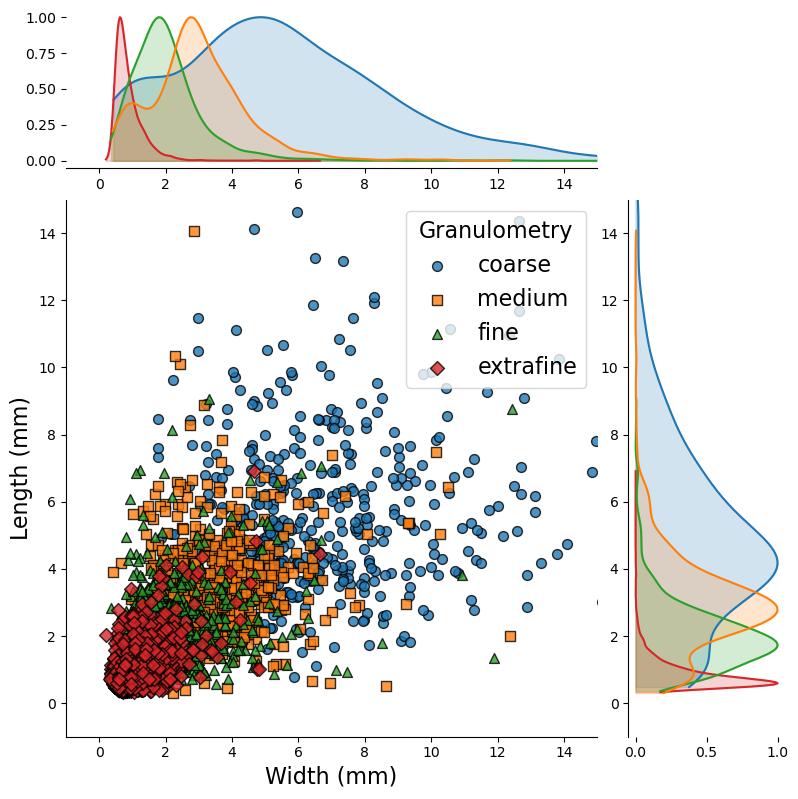

In [2]:
from scipy.stats import gaussian_kde
# fig, ax = plt.subplots(2, 2, figsize=(10,10))
# ax = ax.flatten()

#g = sns.jointplot(data=df_tot, x='width', y='length',hue='granulometry', kind='scatter', ratio=3, marginal_kws={})

# Create jointplot
g = sns.jointplot(
    data=df_tot,
    x='width',
    y='length',
    hue='granulometry',
    kind='scatter',
    height=8,
    ratio=3,
    palette='deep',
    s=50,  # Size of the markers
    linewidth=0.5,
    marker='o',
    edgecolor='black',
    alpha=0.8,
    legend=False,

)

# Access the marginal axes
ax_marg_x = g.ax_marg_x
ax_marg_y = g.ax_marg_y

# Clear marginal axes
ax_marg_x.clear()
ax_marg_y.clear()

# Plot KDEs for each 'granulometry' group
colors = [sns.color_palette()[0], sns.color_palette()[3], sns.color_palette()[2], sns.color_palette()[1]]

def plot_normalized_kde(ax, data, orientation='horizontal', color='blue'):
    # Compute KDE
    kde = gaussian_kde(data)
    # Generate x or y values for plotting
    if orientation == 'horizontal':
        x_vals = np.linspace(data.min(), data.max(), 200)
        kde_vals = kde(x_vals)
        # Normalize to max=1
        kde_vals /= kde_vals.max()
        # Fill with lighter color first
        ax.fill_between(x_vals, 0, kde_vals, color=color, alpha=0.2)
        # Plot main line
        ax.plot(x_vals, kde_vals, color=color)
        ax.set_xlabel('Width (mm)')
        ax.set_ylabel('Density (normalized)')
    else:
        y_vals = np.linspace(data.min(), data.max(), 200)
        kde_vals = kde(y_vals)
        kde_vals /= kde_vals.max()
        # Fill with lighter color first
        ax.fill_betweenx(y=y_vals, x1=0, x2=kde_vals, color=color, alpha=0.2)
        # Plot main line
        ax.plot(kde_vals, y_vals, color=color)
        ax.set_ylabel('Length (mm)')
        ax.set_xlabel('Density (normalized)')



for i, (group, group_df) in enumerate(df_tot.groupby('granulometry')):
    print(f"Processing group: {group}")
    # Plot for x margin
    plot_normalized_kde(ax_marg_x, group_df['width'], orientation='horizontal', color=colors[i])
    # Plot for y margin
    plot_normalized_kde(ax_marg_y, group_df['length'], orientation='vertical', color=colors[i])


# Remove existing scatter plots
for artist in g.ax_joint.collections:
    artist.set_visible(False)

# Define marker styles for each 'granulometry' group
markers = {'coarse': 'o', 'medium': 's', 'fine': '^', 'extrafine': 'D'}  # adjust categories accordingly

# Plot points manually for each 'granulometry' group with specific markers
for i, (group_value, marker_shape) in enumerate(markers.items()):
    group_df = df_tot[df_tot['granulometry'] == group_value]
    g.ax_joint.scatter(
        group_df['width'],
        group_df['length'],
        marker=marker_shape,
        label=group_value,
        edgecolor='black',
        color=sns.color_palette()[i],
        s=50,
        alpha=0.8
    )



fontsize = 16
#plt.xlim(0, 16)
#plt.ylim(0, 16)
#plt.yscale('log')
#plt.xscale('log')
plt.xlim([-1, 15])
plt.ylim([-1, 15])
plt.xlabel('Width (mm)', fontsize=fontsize)
plt.ylabel('Length (mm)', fontsize=fontsize)
plt.legend(title='Granulometry', fontsize=fontsize, title_fontsize=fontsize)
plt.show()

In [3]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

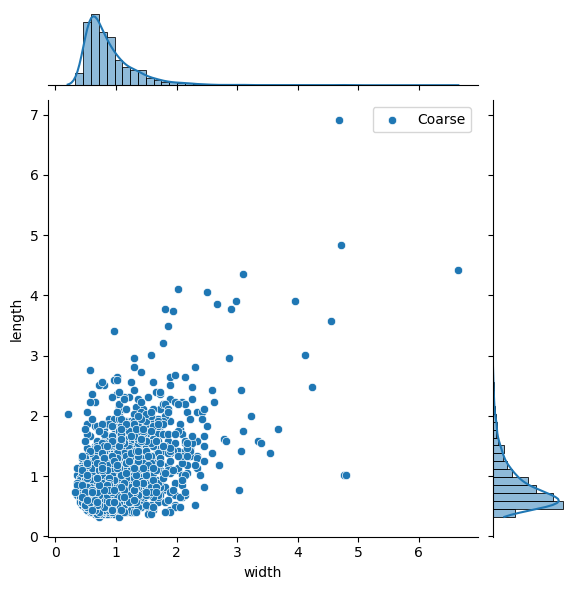

In [17]:
# K-MEANS to find clusters 

sns.jointplot(data=df_4, x='width', y='length', kind='scatter',  marginal_kws=dict(bins=50, kde=True), label=f'Coarse')

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Replace this with your actual data: list of [length, width] for each particle
# Example data:
# data = np.array([
#     [10, 2],
#     [12, 2.1],
#     [9, 1.8],
#     [50, 4],
#     [52, 4.3],
#     [48, 3.9],
#     # Add more data points here
# ])

data = df_4[['length', 'width']].values  # Assuming df_1 has 'length' and 'width' columns

# Step 1: Normalize/Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 2: Determine optimal k using silhouette score
K = range(1, 8)
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    print(f'k={k}, silhouette score={score:.3f}')

# Plot silhouette scores to choose best k
plt.figure()
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

# Choose the best k (highest silhouette score)
best_k = K[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {best_k}')

# Step 3: Apply KMeans with best k
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Step 4: Visualize clusters on original data
plt.figure()
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # extend if needed
for i in range(best_k):
    cluster_points = data[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {i+1}', color=colors[i % len(colors)])
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Particle Clusters')
plt.legend()

# Step 5: Interpret cluster centroids
centroids = kmeans.cluster_centers_
original_centroids = scaler.inverse_transform(centroids)
for i, centroid in enumerate(original_centroids):
    print(f'Centroid of Cluster {i+1}: Length={centroid[0]:.2f}, Width={centroid[1]:.2f}')

# Optional: Determine which cluster corresponds to particles and sticks
# For example, assume sticks have higher length-to-width ratio
ratios = original_centroids[:,0] / original_centroids[:,1]
cluster_types = ['Stick' if ratio > 3 else 'Particle' for ratio in ratios]
for i, ctype in enumerate(cluster_types):
    print(f'Cluster {i+1} is likely: {ctype}')

plt.show()

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Number of clusters found: 2
Number of noise/outliers: 266 out of 604 (44.04%)


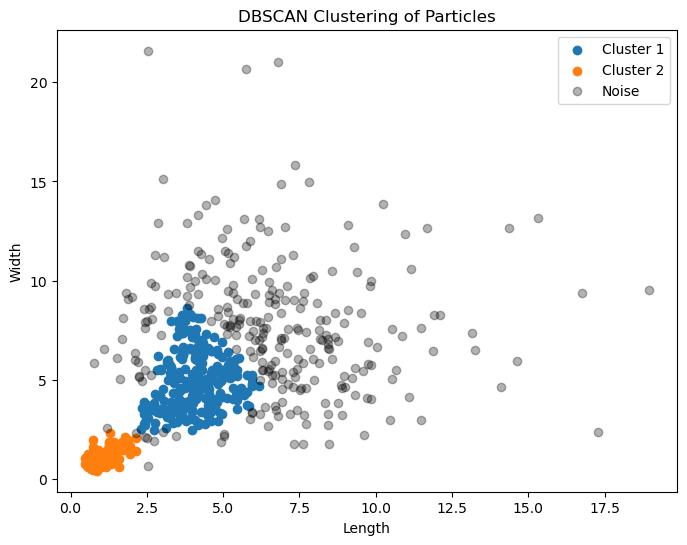

Cluster 1: 40.40% of total points
Cluster 2: 15.56% of total points
Cluster 1 is likely: Particle
Cluster 2 is likely: Particle
Estimated percentage of particles: 55.96%
Estimated percentage of sticks: 0.00%


In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Your data:
data = df_1[['length', 'width']].values  # assuming df_4 has 'length' and 'width'

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply DBSCAN
# You might need to tune eps and min_samples for your data
dbscan = DBSCAN(eps=0.2, min_samples=15)  # adjust eps and min_samples as needed
labels = dbscan.fit_predict(scaled_data)

# Number of clusters (excluding noise label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters found: {n_clusters}')

# Count noise points
n_noise = np.sum(labels == -1)
total_points = len(data)
print(f'Number of noise/outliers: {n_noise} out of {total_points} ({n_noise/total_points*100:.2f}%)')

# Plot results
plt.figure(figsize=(8,6))
palette = sns.color_palette('tab10', n_colors=n_clusters)
for cluster_id in set(labels):
    if cluster_id == -1:
        # Noise
        plt.scatter(data[labels == cluster_id, 0], data[labels == cluster_id, 1], color='k', alpha=0.3, label='Noise')
    else:
        plt.scatter(data[labels == cluster_id, 0], data[labels == cluster_id, 1], label=f'Cluster {cluster_id+1}', color=palette[cluster_id % len(palette)])

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('DBSCAN Clustering of Particles')
plt.legend()
plt.show()

# Analyze clusters to estimate percentages
cluster_counts = {}
for cluster_id in range(n_clusters):
    count = np.sum(labels == cluster_id)
    cluster_counts[cluster_id] = count

# Calculate percentage of total points
percentages = {cluster_id: count/total_points*100 for cluster_id, count in cluster_counts.items()}

# Output cluster info
for cluster_id, percent in percentages.items():
    print(f'Cluster {cluster_id+1}: {percent:.2f}% of total points')

# Optional: classify clusters based on shape ratios
# For example, assume sticks have higher length-to-width ratio
cluster_centroids = []
for cluster_id in range(n_clusters):
    cluster_points = data[labels == cluster_id]
    centroid = np.mean(cluster_points, axis=0)
    cluster_centroids.append(centroid)

cluster_centroids = np.array(cluster_centroids)
ratios = cluster_centroids[:,0] / cluster_centroids[:,1]
cluster_types = ['Stick' if ratio > 3 else 'Particle' for ratio in ratios]

for i, ctype in enumerate(cluster_types):
    print(f'Cluster {i+1} is likely: {ctype}')

# Estimate overall % of particles and sticks
# Count how many points are in clusters classified as particles or sticks
particle_indices = [i for i, t in enumerate(cluster_types) if t == 'Particle']
stick_indices = [i for i, t in enumerate(cluster_types) if t == 'Stick']

particle_points = sum(cluster_counts[i] for i in particle_indices)
stick_points = sum(cluster_counts[i] for i in stick_indices)

percent_particles = particle_points / total_points * 100
percent_sticks = stick_points / total_points * 100

print(f"Estimated percentage of particles: {percent_particles:.2f}%")
print(f"Estimated percentage of sticks: {percent_sticks:.2f}%")


Number of clusters found: 2
Number of noise/outliers: 266 out of 604 (44.04%)


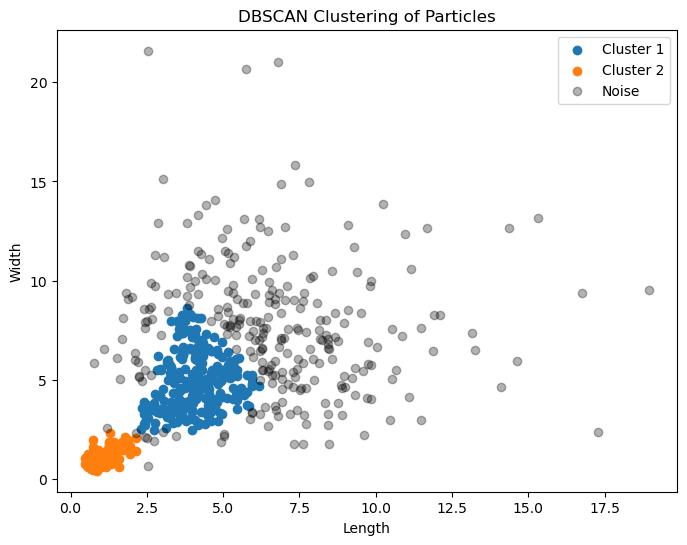


Cluster Summary:
   Cluster  Count  Mean Length  Mean Width
0        1    244     4.114244    4.888477
1        2     94     1.039906    1.060250
2        0    266     6.609886    7.620192


In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

dataset = df_1  # Use df_1 or any other DataFrame with 'length' and 'width'
# Your data:
data = dataset[['length', 'width']].values  # assuming df_1 has 'length' and 'width'

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply DBSCAN
# Adjust eps and min_samples as needed
dbscan = DBSCAN(eps=0.2, min_samples=15)
# df_1 --> eps=0.2, min_samples=15
# df_4 --> eps=0.2, min_samples=20
labels = dbscan.fit_predict(scaled_data)

# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters found: {n_clusters}')

# Count noise points
n_noise = np.sum(labels == -1)
total_points = len(data)
print(f'Number of noise/outliers: {n_noise} out of {total_points} ({n_noise/total_points*100:.2f}%)')

# Plot clustering results
plt.figure(figsize=(8,6))
palette = sns.color_palette('tab10', n_colors=n_clusters)
for cluster_id in set(labels):
    if cluster_id == -1:
        plt.scatter(data[labels == cluster_id, 0], data[labels == cluster_id, 1], color='k', alpha=0.3, label='Noise')
    else:
        plt.scatter(
            data[labels == cluster_id, 0],
            data[labels == cluster_id, 1],
            label=f'Cluster {cluster_id+1}',
            color=palette[cluster_id % len(palette)]
        )

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('DBSCAN Clustering of Particles')
plt.legend()
plt.show()

# Generate cluster summaries
import pandas as pd

# Create DataFrame with original data and labels
df_clusters = dataset.copy()
df_clusters['cluster'] = labels

# Filter out noise if desired
clusters = set(labels)
# if -1 in clusters:
#     clusters.remove(-1)

# Prepare summary list
summary_list = []

for cluster_id in clusters:
    cluster_points = df_clusters[df_clusters['cluster'] == cluster_id]
    count = len(cluster_points)
    mean_length = cluster_points['length'].mean()
    mean_width = cluster_points['width'].mean()
    summary_list.append({
        'Cluster': cluster_id+1,  # +1 for human-friendly numbering
        'Count': count,
        'Mean Length': mean_length,
        'Mean Width': mean_width
    })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_list)
print("\nCluster Summary:")
print(summary_df)

k=1 (single cluster): silhouette score not applicable
k=2, silhouette score=0.602
k=3, silhouette score=0.517
k=4, silhouette score=0.461
k=5, silhouette score=0.433
k=6, silhouette score=0.409
k=7, silhouette score=0.405


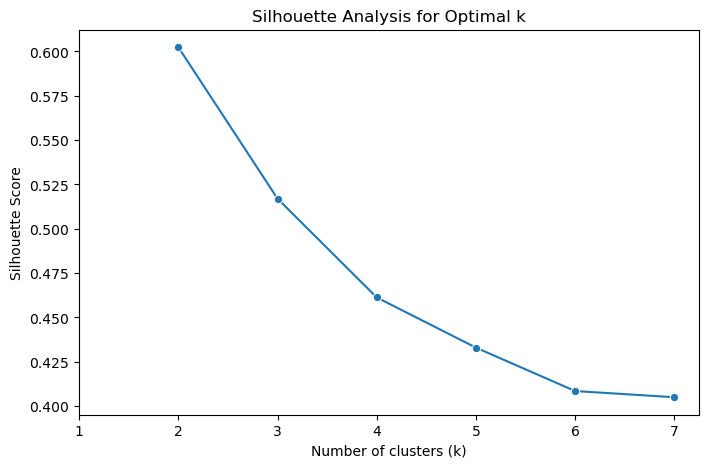

Optimal number of clusters: 2


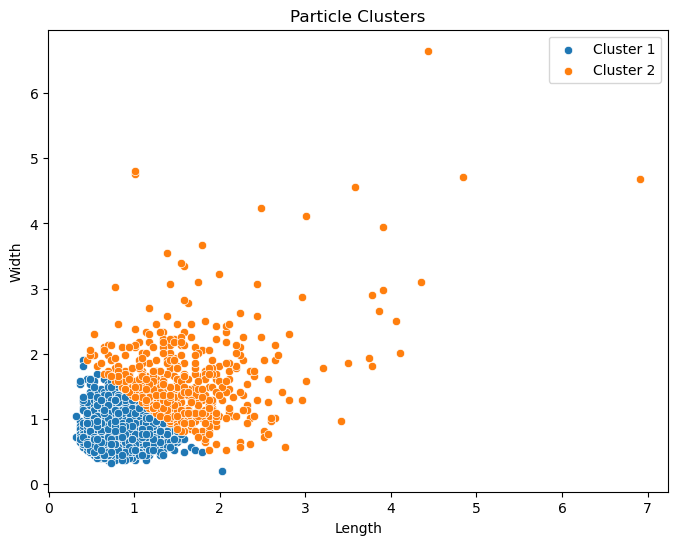

Centroid of Cluster 1: Length=0.71, Width=0.75
Centroid of Cluster 2: Length=1.58, Width=1.58
Cluster 1 is likely: Particle
Cluster 2 is likely: Particle


In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Your data:
# data = np.array([...]) or from your DataFrame
data = df_4[['length', 'width']].values  # Assuming df_4 has 'length' and 'width' columns

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine optimal k using silhouette score (including k=1)
K = range(1, 8)
silhouette_scores = []

for k in K:
    if k == 1:
        # Silhouette score is not defined for k=1
        silhouette_scores.append(np.nan)
        print(f'k={k} (single cluster): silhouette score not applicable')
        continue
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    print(f'k={k}, silhouette score={score:.3f}')

# Plot silhouette scores
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(K), y=silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.xticks(K)
plt.show()

# Choose best k (excluding k=1 if silhouette score is NaN)
valid_scores = [score if not np.isnan(score) else -1 for score in silhouette_scores]
best_k = K[np.argmax(valid_scores)]
print(f'Optimal number of clusters: {best_k}')

# Handle case when best_k=1
if best_k == 1:
    print("All data assigned to a single cluster.")
    cluster_labels = np.zeros(len(data), dtype=int)
else:
    # Apply KMeans with best_k
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)

# Plot clusters with seaborn
plt.figure(figsize=(8, 6))
if best_k == 1:
    sns.scatterplot(x=data[:,0], y=data[:,1], color='blue', label='All Data')
else:
    palette = sns.color_palette('tab10', n_colors=best_k)
    for i in range(best_k):
        cluster_points = data[cluster_labels == i]
        sns.scatterplot(x=cluster_points[:,0], y=cluster_points[:,1], label=f'Cluster {i+1}', color=palette[i])

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Particle Clusters')
plt.legend()
plt.show()

# Centroids
if best_k > 1:
    centroids_scaled = kmeans.cluster_centers_
    centroids = scaler.inverse_transform(centroids_scaled)
    for i, centroid in enumerate(centroids):
        print(f'Centroid of Cluster {i+1}: Length={centroid[0]:.2f}, Width={centroid[1]:.2f}')
    # Optional: classify clusters based on ratio
    ratios = centroids[:,0] / centroids[:,1]
    cluster_types = ['Stick' if ratio > 3 else 'Particle' for ratio in ratios]
    for i, ctype in enumerate(cluster_types):
        print(f'Cluster {i+1} is likely: {ctype}')
else:
    # Single cluster case
    centroid = np.mean(data, axis=0)
    print(f'Overall centroid: Length={centroid[0]:.2f}, Width={centroid[1]:.2f}')